# 이변량_범주 vs 숫자

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


범주별 숫자를 비교할 때 사용되는 방식은 **범주별 평균 비교** 입니다.  


## 2.범주 --> 숫자

titanic data에서 Age를 Y로 두고 비교해 봅시다.

### 1) 시각화 : 평균 비교 barplot, boxplot 

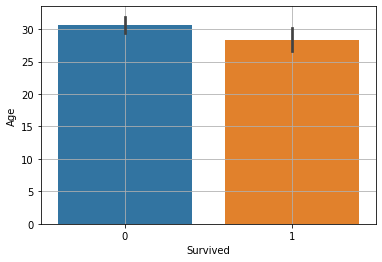

In [4]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x="Survived", y="Age", data=titanic)
plt.grid()
plt.show()

위 두 범주간에 평균에 차이가 있나요?

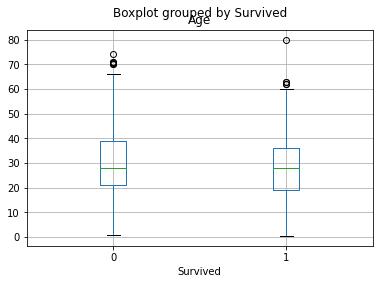

In [5]:
# 박스플롯으로 비교해 봅시다.
titanic.boxplot('Age', 'Survived')
plt.show()

### 2)수치화 : t-test(두 범주), anova(세 범주 이상)

#### ①t-test
두 집단의 평균을 비교합니다.
* 예제는 Two sample T-test와 양측검정만 다룹니다. 
* 우리는 X --> Y의 관계에서 ,두 변수간에 관련이(차이가) 있는지, 없는지를 확인하는 것이 제일 중요하기 때문입니다.

* 주의사항 : 데이터에 NaN이 있으면 계산이 안됩니다. .notnull() 등으로 NaN을 제외한 데이터를 사용해야 합니다.

* t 통계량
    * 두 평균의 차이를 표준오차로 나눈 값.
    * 기본적으로는 두 평균의 차이로 이해해도 좋습니다.
    * 우리의 가설(대립가설)은 차이가 있다는 것이므로, t 값이 크던지 작던지 하기를 바랍니다. 
    * 보통, t 값이 -2보다 작거나, 2보다 크면 차이가 있다고 봅니다. 

In [ ]:
import scipy.stats as spst
import numpy as np
import random as rd


In [ ]:
# 모집단 만들기
pop1 = [round(rd.normalvariate(160, 10),1) for i in range(100000)]
pop2 = [round(rd.normalvariate(170, 10),1) for i in range(100000)]

In [ ]:
# 우리는 모집단을 알 수 없지만. 그래도 살짝 살펴봅시다.
plt.figure(figsize=(10,6))
sns.distplot(pop1, hist=False, kde=True)
sns.distplot(pop2, hist=False, kde=True)
plt.show()

In [ ]:
# 표본을 추출합니다. 먼저 pop1으로 부터 두 샘플을 추출합시다.
s1 = rd.sample(pop1,100)
s2 = rd.sample(pop1,100)


In [ ]:
# t-test
spst.ttest_ind(s1, s2)

p.value의 의미는?

In [ ]:
# 이번에는 두 모집단으로 부터 각각 샘플링
s1 = rd.sample(pop1,100)
s2 = rd.sample(pop2,100)

In [ ]:
# t-test
spst.ttest_ind(s1, s2)

p.value의 의미는?

In [ ]:
# 면적을 의미함.. 

* 이번엔 타이타닉 데이터로 시도해 봅시다.
    * 생존여부 --> Age : 생존여부 별로 나이에 차이가 있을것이다.


In [6]:
# 먼저 NaN이 있는지 확인해 봅시다.
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
temp = titanic.loc[titanic['Age'].notnull()]
died = temp.loc[temp['Survived']==0, 'Age']
survived = temp.loc[temp['Survived']==1, 'Age']

In [8]:
spst.ttest_ind(died, survived) # t통계량과 pvalue값을 나타냄. 

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

In [18]:
spst.ttest_ind( survived,died)

Ttest_indResult(statistic=-2.06668694625381, pvalue=0.03912465401348249)

#### 실습 : t-test

성별에 따라 운임에 차이가 있을 것이다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


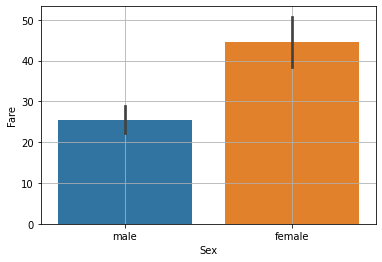

In [14]:
# 시각화 
sns.barplot("Sex", "Fare", data=titanic)
plt.grid()
plt.show()

In [16]:
# 수치화 : t검정

male = temp.loc[temp['Sex']=='male', 'Fare']
female = temp.loc[temp['Sex']=='female', 'Fare']
spst.ttest_ind(male, female) # t통계량과 pvalue값을 나타냄. 

Ttest_indResult(statistic=-5.022960682752043, pvalue=6.439279020446988e-07)

In [17]:
spst.ttest_ind( female,male) # t통계량과 pvalue값을 나타냄. 

Ttest_indResult(statistic=5.022960682752043, pvalue=6.439279020446988e-07)

In [ ]:
# 결과적으로 pvalue값이 매우 작으므로 차이가 크다고 볼 수 있다!

In [ ]:
spst.

#### ②anova

* 분산 분석 **AN**alysis **O**f **VA**riance
* 여러 집단 간에 차이는 어떻게 비교할 수 있을까요?
* 여기서 기준은 전체 평균 입니다.
* 𝐹 통계량 = 
    * (집단 간 분산)/(집단 내 분산) = (전체 평균 − 각 집단 평균)/(각 집단의 평균 − 개별 값)
    * 값이 대략 2~3 이상이면 차이가 있다고 판단합니다.

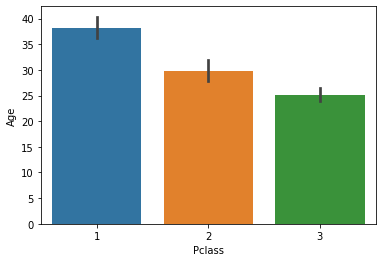

In [19]:
# Pclass(3 범주) --> Age
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.show()

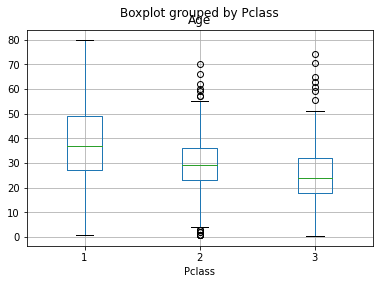

In [20]:
titanic.boxplot('Age', 'Pclass')
plt.show()

In [26]:
temp = titanic.loc[titanic['Age'].notnull()]   # age에 nan값이 있으므로 빼고 계산해야함. 
P_1 = temp.loc[temp.Pclass == 1, 'Age']
P_2 = temp.loc[temp.Pclass == 2, 'Age']
P_3 = temp.loc[temp.Pclass == 3, 'Age']

In [27]:
spst.f_oneway(P_1, P_2, P_3)
# f통계량은 매우 크게, pvalue는 매우 작게 나옴 --> 분명한 차이가 있음을 결론지을 수 있다. 

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

In [24]:
P_1

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 216, dtype: float64


#### 실습 ANOVA

승선지역(Embarked)별로 운임에 차이가 있을 것이다.
* 시각화와 수치화로 확인해 봅시다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


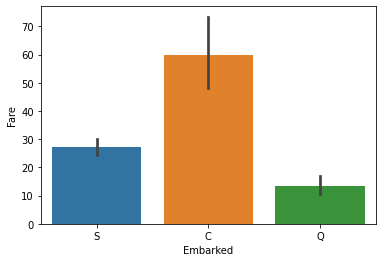

In [32]:
sns.barplot('Embarked','Fare',data=titanic)
plt.show()

In [35]:
d1 = titanic.loc[titanic['Embarked']=='S','Fare']
d2 = titanic.loc[titanic['Embarked']=='C','Fare']
d3 = titanic.loc[titanic['Embarked']=='Q','Fare']

In [36]:
spst.f_oneway(d1,d2,d3)

F_onewayResult(statistic=38.14030520011266, pvalue=1.2896450252631794e-16)

## 3.종합실습

### 1) 환경준비

* 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 카시트 매출액


① 타이타닉 생존자

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Fare	|	Passenger fare	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [ ]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv', 
                      usecols = ['Survived','Pclass','Sex','Age','Fare','Embarked'])
titanic.head()

② 카시트 매출액

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [ ]:
# 카시트 매출액
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
carseat = pd.read_csv(path)
carseat.drop('Education', axis = 1, inplace = True)
carseat.head()

### 2) 범주 --> 숫자 : 시각화

① titanic 생존여부에 따라 나이에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


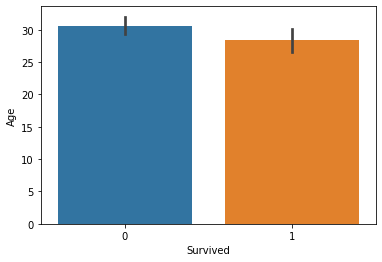

In [38]:
sns.barplot('Survived','Age',data=titanic)
plt.show()

* 박스플롯으로 시각화 해 봅시다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


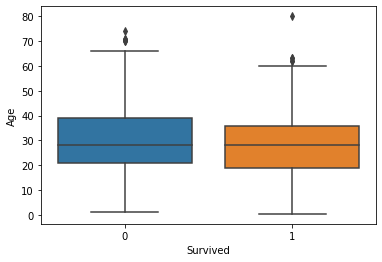

In [40]:
sns.boxplot('Survived','Age',data=titanic)
plt.show()

* 위 두 범주간에 평균에 차이가 있나요?

In [46]:
temp = titanic.loc[titanic['Age'].notnull(),:]
S = temp.loc[temp['Survived']==0,'Age']
D = temp.loc[temp['Survived']==1,'Age']

In [44]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
# t검정을 통해 pvalue값을 구해서 판단 --> 차이 있다! 
spst.ttest_ind(S,D)

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

② titanic 성별에 따라 운임에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


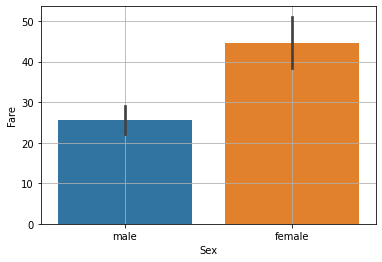

In [53]:
sns.barplot(titanic['Sex'],titanic['Fare'])
plt.grid()
plt.show()

* 박스플롯으로 시각화 해 봅시다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


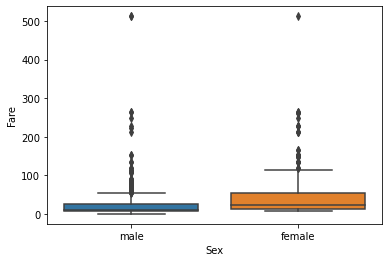

In [54]:
sns.boxplot(titanic['Sex'],titanic['Fare'])
plt.show()

* 위 범주간 평균에 차이가 있나요?

In [ ]:
# 있어보임 

③ titanic 승선지역(Embarked)에 따라 나이에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

In [ ]:
sns.barplot()

* 박스플롯으로 시각화 해 봅시다.

* 위 범주간 평균에 차이가 있나요?

④ carseat의 국내외여부(US)에 따라 매출액(Sales)에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

* 박스플롯으로 시각화 해 봅시다.

⑤ carseat의 진열상태(ShelveLoc)에 따라 매출액(Sales)에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

* 박스플롯으로 시각화 해 봅시다.

* 위 범주간 평균에 차이가 있나요?

### 3)수치화 : t-test(두 범주), anova(세 범주 이상)

① titanic 생존여부에 따라 나이에 차이가 있을까요?

* t-test를 수행해 봅시다.

* t-test 결과를 해석해 봅시다.

② titanic 성별에 따라 운임에 차이가 있을까요?

* t-test를 수행해 봅시다.

* t-test 결과를 해석해 봅시다.

③ titanic 승선지역(Embarked)에 따라 나이에 차이가 있을까요?

* 분산분석(anova)을 수행해 봅시다.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


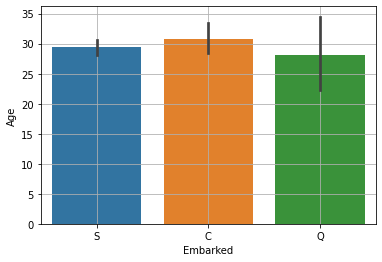

In [49]:
sns.barplot(titanic['Embarked'],titanic['Age'])
plt.grid()
plt.show()

In [1]:
temp = titanic.loc[titanic['Age'].notnull()]
S = temp.loc[temp['Embarked']=='S','Age']
C = temp.loc[temp['Embarked']=='C','Age']
Q = temp.loc[temp['Embarked']=='Q','Age']

NameError: name 'titanic' is not defined

* anova 결과를 해석해 봅시다.

In [51]:
spst.f_oneway(S,C,Q)
# 승선지역에 따른 나이의 차이는 없는것으로 보임. 대립가설 기각. 

F_onewayResult(statistic=0.6366398124910262, pvalue=0.5293693792571084)